In [17]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import FixedLocator, FormatStrFormatter
import scipy.stats as stats
from scipy.stats import linregress

In [18]:
# Carga del dataset.
df = pd.read_excel("J:/My Drive/Experimento/Plantillas finales/5. Generales - Con Cambios de opinión por Ítem (Base 2).xlsx")

In [26]:
# Las dos variables.

X = 'cambio_op_con'
Y = 'indice_progresismo'

In [27]:
#Leyendas.
LeyendaX = 'Cambio de opinión en ítems Conservadores'
LeyendaY = 'Cercanía a Bullrich'

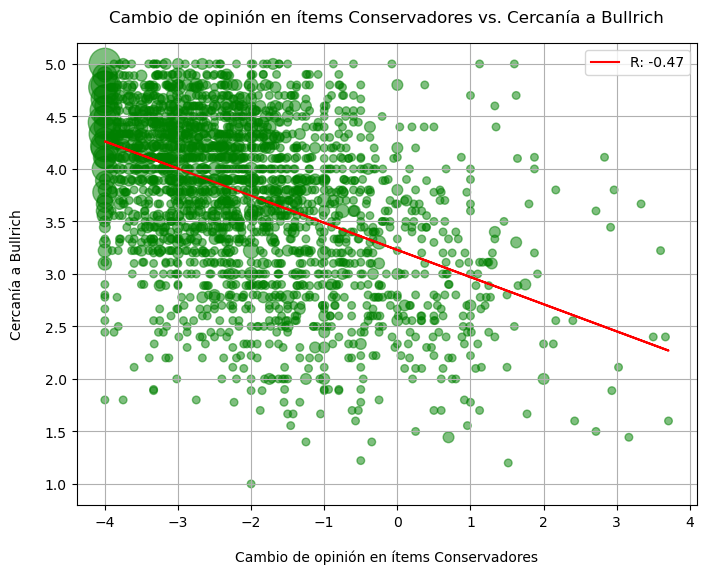

In [28]:
# Gráfico.

# Crear el gráfico
plt.figure(figsize=(8, 6))


# Regresión lineal.
# Calcular el R: coeficiente de correlación.
R = df[[X, Y]].corr().iloc[0,1]

# Calcular regresión lineal.
slope, intercept, r_value, p_value, std_err = linregress(df[X], df[Y])

# Gráfico de la regresión lineal (la línea de tendencia).
plt.plot(df[X], 
         intercept + slope * (df[X]),                 
         color='red',                                
         label=f'R: {R:.2f}')


# Puntos y tamaños.
# Obtener el número de ocurrencias de cada combinación de valores (x, y).
df_Agrupado = df.groupby([X, Y]).size().reset_index(name='Ocurrencias')

# Gráfico de dispersión con bolas de tamaño ajustado por cantidad de datos.
plt.scatter(df_Agrupado[X], df_Agrupado[Y], s=df_Agrupado['Ocurrencias'] * 30, color='green', alpha=0.5)


# Leyendas.
# Etiquetas de los ejes.
plt.xlabel(LeyendaX, labelpad = 15)
plt.ylabel(LeyendaY, labelpad = 15)

# Agregar texto para las leyendas 'Min' y 'Max'

#Leyendas del eje x.
# plt.text(min_x, 
#         posicion_y, 
#         f'{leyenda_x_bajo}', 
#         ha='center', va='top', 
#         color='gray')

#plt.text(max_x, 
#         posicion_y, 
#         f'{leyenda_x_alto}', 
#         ha='center', va='top', 
#         color='gray')

#Leyendas del eje y.
#plt.text(posicion_x, 
#         min_y, f'{leyenda_y_bajo}', 
#         ha='right', va='center', 
#         color='gray', 
#         rotation='vertical')

#plt.text(posicion_x, 
#         max_y, f'{leyenda_y_alto}', 
#         ha='right', va='center', 
#         color='gray', 
#         rotation='vertical')


# Título.
plt.title(f'{LeyendaX} vs. {LeyendaY}', pad=15)

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()